In [3]:
# import the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")



In [2]:
#upload the dataset
data = pd.read_csv("ABAdRecall.csv")

### Exploring the dataset

In [5]:
data.head() # glance  our dataset

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


In [6]:
data.describe() #description of the dataset

,hour,platform_os,yes,no
count,8077.000000,8077.000000,8077.000000,8077.000000
mean,11.615080,5.947134,0.070818,0.083075
std,5.734879,0.224333,0.256537,0.276013
min,0.000000,5.000000,0.000000,0.000000
25%,7.000000,6.000000,0.000000,0.000000
50%,13.000000,6.000000,0.000000,0.000000
75%,15.000000,6.000000,0.000000,0.000000
max,23.000000,7.000000,1.000000,1.000000


In [7]:
print('This dataset has '+str(data.shape[0])+' rows, and '
                         +str(data.shape[1])+ ' columns')


This dataset has 8077 rows, and 9 columns


In [8]:
data.info() #summery
# This shows us the different data types and number of non-null values in
#each columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


 **NB :**
- As we can show in the summery ,we have totally 8077 data and there is no null values.

In [9]:
data.nunique().sort_values(ascending=False) # number of unique  values in each vriable

auction_id     8077
device_make     270
hour             24
browser          15
date              8
platform_os       3
no                2
yes               2
experiment        2
dtype: int64

In [194]:
sample_data = data[np.logical_or(data['yes']==1,data['no']==1)]
sample_data.shape # the data which contain who has  animpression to answer for 

(1243, 9)

 **NB :**
- the data which contain who has an impression to answer for BIO questionarie and they actually reply as "yes" or "no"

### Overview

In [183]:
# plot multiple his in one graph
def multple_hist(data,bins,legend,color):
    for i in range(len(data)):
        plt.hist(data[i], bins, color=color[i], alpha=0.5)
        plt.legend(legend)
    plt.show()

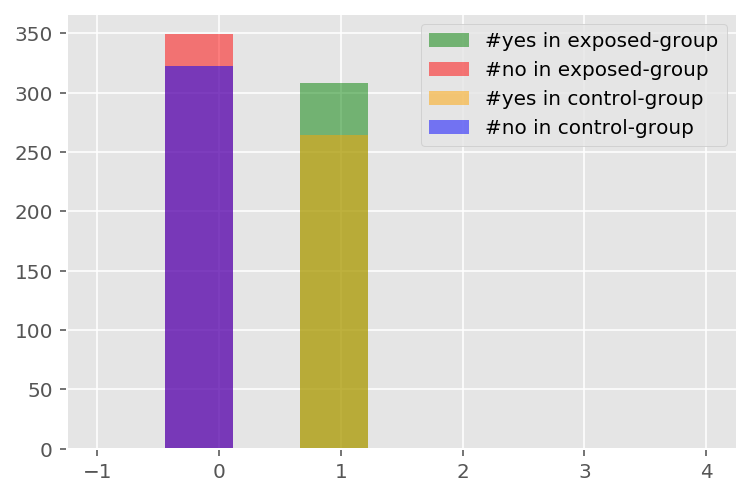

In [189]:
this_data = sample_data[['experiment','yes','no']]
exposed = this_data[this_data["experiment"] == "exposed"]
control = this_data[this_data["experiment"] == "control"]

datas = [exposed[exposed['yes']==1]['yes'],exposed[exposed['yes']==0]['yes'],
         control[control['yes']==1]['yes'],control[control['yes']==0]['yes']]

legend = ["#yes in exposed-group","#no in exposed-group",
          "#yes in control-group","#no in control-group"]
bins = np.linspace(-1, 4, 10)
color=["green","red","orange","blue"]

multple_hist(datas,bins,legend,color)

**NB:**
- The above figure shows us the distribution of the answers of the BIO(brand impact optimizer) for the users who are under the exposed and control group. 

- when we see histogram the count of yes is less than count no, which means most users don't know the brand smartAd.

**But when we compare the count of #yes in exposed and in control group ,the exposed group more know the brand smartAd than control group.** 
- #yes in exposed group is between  300 and 350
- #yes in control group is between  250 and 300


## Task 2: Analysis 
#### Task 2.1 : Classic and sequential A/B testing analysis


- Perform hypothesis testing: apply the classical p-value based algorithm and the  sequential A/B testing algorithm for which a starter code is provided..